<h3>Simple linear regression lab</h3>


#### Aims 

* Do a simple linear regression on the X_train and Y_train data in Python
* Compare least square solution with gradient descent solution



#### Tasks 
* Download the data (‘olympic100m.txt’) from the Moodle page
* Plot Olympic year against winning time
* Plot the loss function in 1D and 2D
* Test the provided gradient descent code with your own code for loss and gradient
* Using the expressions derived provided in the supplement slides to compute $w_0$ and $w_1$. 
* Create a new plot that includes the data and the function defined by $w_0$ and $w_1$
* Make a prediction at 2012

#### Taks 1: We start by loading the X_train and Y_train data

In [1]:
import numpy as np 

X_train = np.loadtxt('X_train.csv', delimiter=',', skiprows=1)
X_test = np.loadtxt('X_test.csv', delimiter=',', skiprows=1)
Y_train = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)[:,1][:,None]

MYCT = X_train[:,0][:,None]
MMIN = X_train[:,1][:,None]
MMAX = X_train[:,2][:,None]
CACH = X_train[:,3][:,None]
CHMIN = X_train[:,4][:,None]
CHMAX = X_train[:,5][:,None]

#### Taks 2: Plot the data
<p>It's useful to start with a plot</p>

Text(0, 0.5, 'PRP')

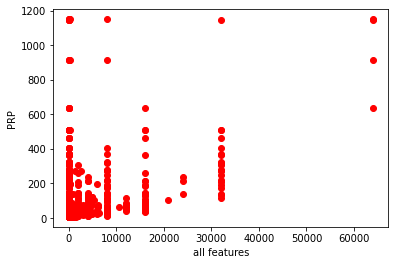

In [2]:
%matplotlib inline
import pylab as plt
plt.plot(X_train, Y_train, 'ro')
plt.xlabel('all features')
plt.ylabel('PRP')

Text(0, 0.5, 'PRP')

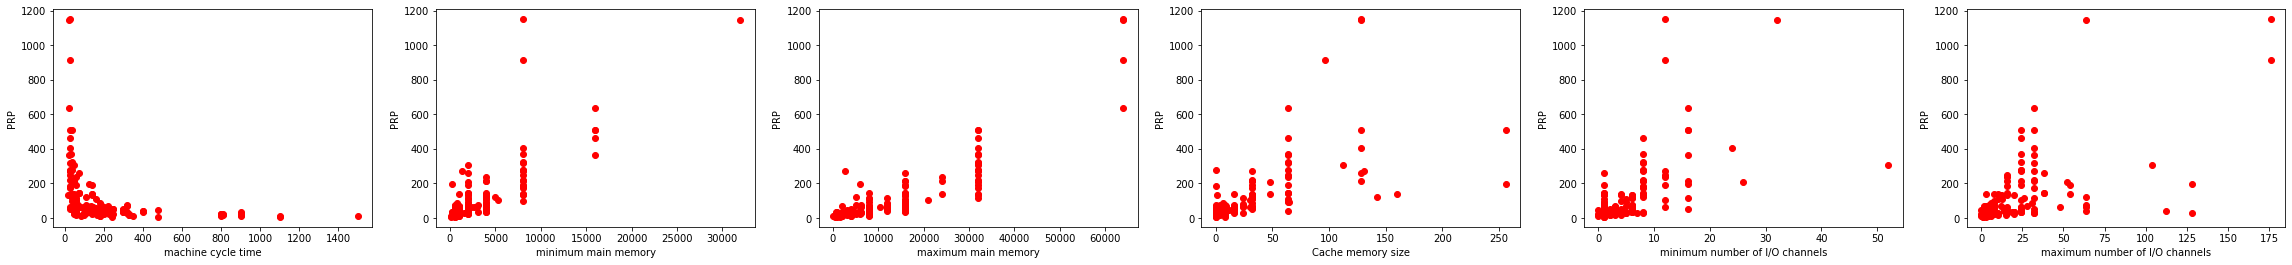

In [3]:
%matplotlib inline
import pylab as plt
fig, axes = plt.subplots(1, 6, figsize=(40, 4))
axes[0].plot(MYCT,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[0].set_xlabel('machine cycle time')
axes[0].set_ylabel('PRP')

axes[1].plot(MMIN,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[1].set_xlabel('minimum main memory')
axes[1].set_ylabel('PRP')

axes[2].plot(MMAX,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[2].set_xlabel('maximum main memory')
axes[2].set_ylabel('PRP')

axes[3].plot(CACH,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[3].set_xlabel('Cache memory size')
axes[3].set_ylabel('PRP')

axes[4].plot(CHMIN,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[4].set_xlabel('minimum number of I/O channels')
axes[4].set_ylabel('PRP')

axes[5].plot(CHMAX,Y_train,'ro') # plot x and t with matplotlib's plot function: plt.plot
axes[5].set_xlabel('maximum number of I/O channels')
axes[5].set_ylabel('PRP')


#### Task 3: Write function for maximum likelihood estimator for $w$ and $\sigma^2$

$$ \hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t},~~\hat{\sigma^2} = \frac{1}{N}\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)$$

In [4]:
def loggausspdf(x,mu,sigma2): # your own function to compute log of gaussian pdf 
    const = -0.5*np.log(2.0*np.pi) - 0.5*np.log(sigma2)
    return const - (1.0/(2*sigma2))*(x-mu)**2

def max_like_w(X, t): # your own function to compute maximum likelihood estimate of w
    return(np.linalg.solve(np.dot(X.T,X),np.dot(X.T,t)))

def max_like_sigma2(X, t, w): # your own function to compute maximum likelihood estimate of sigma^2
    return(((t-np.dot(X,w))**2).mean())

def polynomial(x, max_order): # your own function to construct polynomial design matrix
    X = np.ones_like(x[:,0][:,None])
    for i in range(max_order):
        X = np.hstack((X,x[:,i][:,None]))
    return(X)


#### Task 4: Test the joint likelihood against the adding of features

- log joint likelihood:  $\sum_{n=1}^N \log p(t_n | x_n, w, \sigma^2) = \sum_{n=1}^N \log \mathcal{N} (t_n; \mathbf{x}_n^T \mathbf{w}, \sigma^2)$
- log joint likelihood at $\hat{\mathbf{w}}$ and $\hat{\sigma^2}$: $\sum_{n=1}^N \log \mathcal{N}(t_n; \mathbf{x}_n^T \hat{\mathbf{w}}, \hat{\sigma^2})$

(168, 1)
(168, 2)
(168, 3)
(168, 4)
(168, 5)
(168, 6)


Text(0.5, 0, 'adding each features')

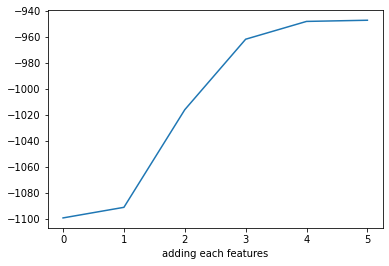

In [5]:
max_order = 6 # maximum order 

L = np.zeros((max_order,1))# preallocate log joint likelihoods
for i in np.arange(max_order):# for loop over all faetures
    X = polynomial(X_train, i)
    print(X.shape)
    w_ml = max_like_w(X,Y_train) # compute maximum likelihood estimate of w
    sigma2_ml = max_like_sigma2(X,Y_train, w_ml) # compute maximum likelihood estimate of sigma^2
    L[i] = loggausspdf(Y_train,np.dot(X,w_ml),sigma2_ml).sum() # compute the log-joint likelihood 
                                                         # at the maximum likelihood estimates
plt.plot(np.arange(max_order),L) # plot L vs adding of features
plt.xlabel('adding each features')

#### Task 7: Predictive variance example, step up
<p>In this example, we look at the predictive variance. Recall that, for maximum likelihood estimators
$$ \hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t},~~\hat{\sigma^2} = \frac{1}{N}\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)^T\left(\mathbf{t} - \mathbf{X}\hat{\mathbf{w}}\right)$$
we have mean prediction:
$$ t_{new} = \hat{\mathbf{w}}^T\mathbf{x}_{new}$$
and variance:
$$ \mbox{var}(t_{new}) = \hat{\sigma^2}\mathbf{x}_{new}^T\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{x}_{new}$$

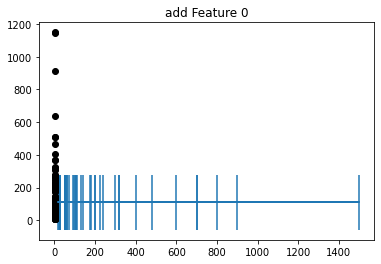

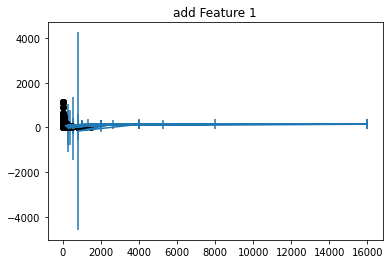

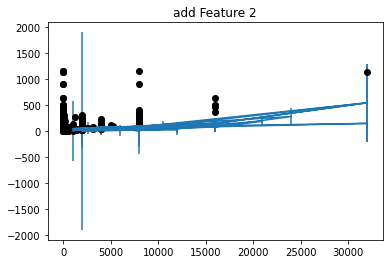

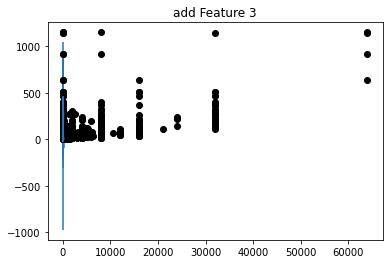

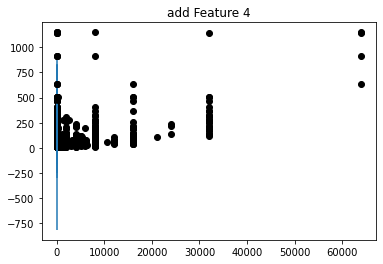

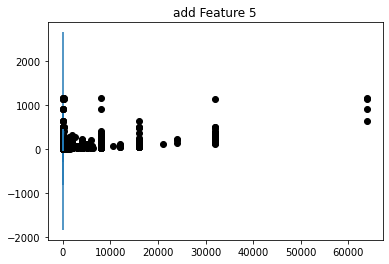

In [6]:
# new x to predict 
orders = max_order# array of possible orders
for i in range(orders):
    X = polynomial(X_train, i) # construct polynoimals on training data
    testX = polynomial(X_test, i) # construct polynoimals on new data
    w = max_like_w(X, Y_train) # compute maximum likelihood estimate of w
    sigma2 = max_like_sigma2(X, Y_train, w) # compute maximum likelihood estimate of sigma2
    test_mean = np.dot(testX,w) # expected prediction 
    test_var = np.diag(sigma2*np.dot(np.dot(testX,np.linalg.inv(np.dot(X.T,X))), 
                                     testX.T))[:,None] # prediction variance
    plt.figure()
    plt.plot(X,Y_train,'ko') # plot training data
    plt.errorbar(X_test[:,i][:,None].flatten(), test_mean.flatten(), yerr=test_var.flatten()) # plot error bar
    plt.title("add Feature " + str(i))

#### Task 9: Sample models from $\mathcal{N}(\hat{\mathbf{w}}, cov\{\mathbf{w}\} ) $

$$\hat{\mathbf{w}}  = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$
$$cov\{\mathbf{w}\} = \hat{\sigma^2} \left(\mathbf{X}^T\mathbf{X}\right)^{-1} $$

for feature 0
(41, 1)
for feature 1
(41, 1)
for feature 2
(41, 1)
for feature 3
(41, 1)
for feature 4
(41, 1)
for feature 5
(41, 1)


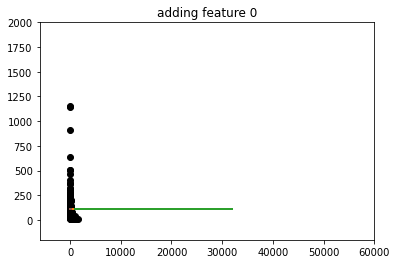

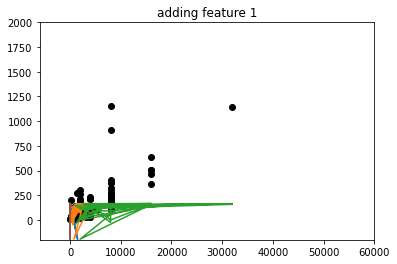

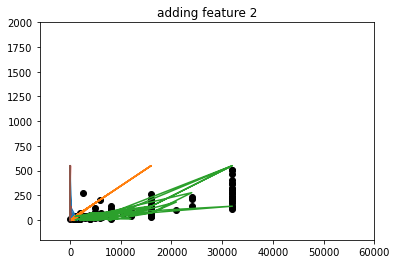

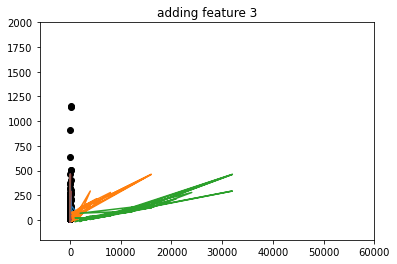

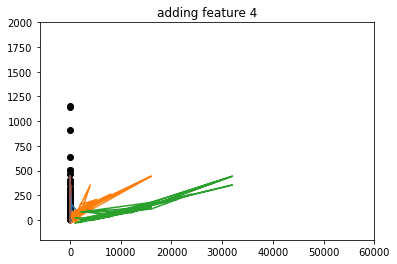

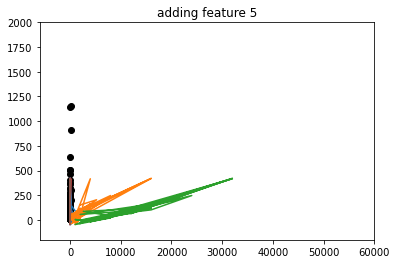

In [7]:
orders = max_order
for i in range(orders):
    X = polynomial(X_train, i) # construct polynoimals on training data
    testX = polynomial(X_test, i) # construct polynoimals on new data
    w = max_like_w(X, Y_train) # compute maximum likelihood estimate of w 
    sigma2 = max_like_sigma2(X, Y_train, w) # compute maximum likelihood estimate of sigma2
    covw = sigma2*np.linalg.inv(np.dot(X.T,X)) # covariance of w
    sampw = np.random.multivariate_normal(w.flatten(),covw,1) # generate samples of w
    Y_test = np.dot(testX,sampw.T) # model prediction based on sampw
    plt.figure()
    plt.plot(X_train[:,i],Y_train,'ko')
    plt.plot(X_test, Y_test)
    plt.xlim([-6000,60000])
    plt.ylim([-200,2000])
    plt.title('adding feature ' + str(i))
    print("for feature " + str(i))
    print(Y_test.shape)

In [8]:
test_header = "Id,PRP"
n_points = X_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = Y_test[:,0]
print(y_pred_pp)
np.savetxt('my_submission.csv', y_pred_pp, fmt='%d', delimiter=",",header=test_header, comments="")

[[  0.         151.97384265]
 [  1.         205.15420099]
 [  2.          31.32169647]
 [  3.           6.9419604 ]
 [  4.          -1.82798006]
 [  5.          63.81304062]
 [  6.         162.38325445]
 [  7.          56.25746087]
 [  8.          88.58190967]
 [  9.         -30.53126346]
 [ 10.          44.07336163]
 [ 11.           9.3547514 ]
 [ 12.         -45.65579548]
 [ 13.          21.63922613]
 [ 14.          -1.72882049]
 [ 15.          27.39349229]
 [ 16.         421.28712718]
 [ 17.          65.27993519]
 [ 18.         421.07930971]
 [ 19.          39.10644348]
 [ 20.         -12.47415774]
 [ 21.           5.0394144 ]
 [ 22.         -13.51321852]
 [ 23.         120.71300642]
 [ 24.          87.76572032]
 [ 25.          42.32175385]
 [ 26.         417.33840825]
 [ 27.         -25.13096341]
 [ 28.         247.85616474]
 [ 29.         102.80382685]
 [ 30.          53.36406171]
 [ 31.         -16.34411829]
 [ 32.         -17.75112014]
 [ 33.         120.09200254]
 [ 34.        